**Buenafe, Lorenz Angelo N.** <br>
**1915058** <br>
**CPE 019 - CPE32S9** <br>

# PART 1

Part 1: Import the Libraries and Data <br>


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path = "/content/drive/MyDrive/CPE 019 Emerging Technologies 3/HOA 4.1/titanic_train.csv"
df = pd.read_csv(path)

In [ ]:
df["Sex"] = df["Sex"].apply(lambda toLabel: 0 if toLabel == 'male' else 1)
df["Age"].fillna(df["Age"].mean(), inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,0.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


Part 2: Plot the Data <br>

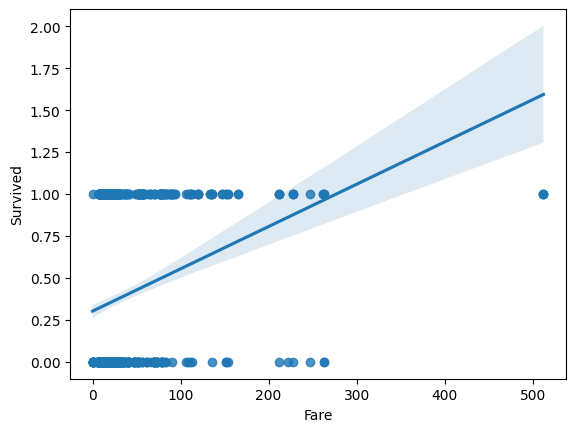

In [ ]:
sns.regplot(x="Fare", y="Survived", data=df);

Part 3: Perform Simple Linear Regression on the SURVIVAL feature column

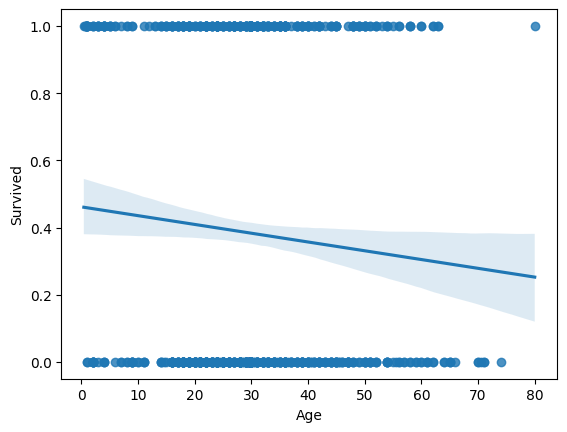

In [ ]:
sns.regplot(x="Age", y="Survived", data=df);

# PART 2

Step 1: Create the dataframe <br>

a) Import pandas and the csv file <br>
First, import pandas and create a dataframe from the Titanic training data set, which is stored in the titanic-train.csv file. Use the pd.read_csv() method.

In [ ]:
#Code cell 1
#import pandas
import pandas as pd
path = "/content/drive/MyDrive/CPE 019 Emerging Technologies 3/HOA 4.1/titanic_train.csv"
training = pd.read_csv(path)

b) Verify the import and take a look at the data.
Variable Description
1. PassengerID Unique identifier for each passenger
2. Survival Did the passenger survive? (0 = No; 1 = Yes)
3. Pclass Passenger ticket class. (1 = 1st; 2 = 2nd; 3 = 3rd)
4. Name Name of the passenger. (last name, first name)
5. Gender Male or female
6. Age Age in years. Mostly integers with float values for children under one year.
7. SibSp Number of siblings or spouse onboard.
8. Parch Number of parents or children onboard.
9. Ticket Ticket number
10. Fare Amount paid for fare in pre-1970 British Pounds
11. Cabin Cabin number
12. Embarked Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)


In [ ]:
#Code cell 2
#verify the contents of the training dataframe using the pandas info() method.
#training.?
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Are there missing values in the data set?
- Yes

In [ ]:
#Code cell 3
#view the first few rows of the data
#
training.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Step 2: Prepare the Data for the Decision Tree Model.
a) Replace string data with numeric labels
We will use scikit-learn to create the decision trees. The decision tree model we will be using can only handle
numeric data. The values for the Gender variable must be transformed into numeric representations. 0 will be
used to represent "male" and 1 will represent "female."
In this code, a lambda expression is used with the apply() dataframe method. This lambda expression
represents a function that uses a conditional statement to replace the text values in the columns with the
appropriate numeric value. The lambda statement can be interpreted as "if the parameter toLabel equals 'male',
return 0, if the value is something else, return 1." The apply() method will execute this function on the values in
every row of the "Gender" column of the dataframe.

In [ ]:
#code cell 4
training["Sex"] = training["Sex"].apply(lambda toLabel: 0 if toLabel ==
'male' else 1)

b) Verify that the Gender variable has been changed.
The output should show values of 0 or 1 for the Gender variable in the dataset.

In [ ]:
#code cell 5
#view the first few rows of the data again
training.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


c) Address Missing Values in the Dataset
The output of the info() method above indicated that about 180 observations are missing the age value. The age
value is important to our analysis. We must address these missing values in some way. While not ideal, we can
replace these missing age values with the mean of the ages for the entire dataset.
This is done by using the fillna() method on the "Age" column in the dataset. The fillna() method will
change the original dataframe by using the inplace = True argument.

In [ ]:
#code cell 6
training["Age"].fillna(training["Age"].mean(), inplace=True)

d) Verify that the values have been replaced.

In [ ]:
#code cell 7
#verify that the missing values for the age variable have been eliminated.
training["Age"].head(10)

0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.699118
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: Age, dtype: float64

What is the value that was used to replace the missing ages?

- .fillna value